# Generate simulate dataset

In [1]:
import sys
import numpy as np
import h5py
import matplotlib.pyplot as plt
sys.path.append("/home/liponan/projects/gammanet/")
from gammanet.simulate import sim_detector_image


## Generate a sample and visualize

In [2]:
nx, ny   = 32, 32    # image size

k_bar    = 0.01       # photons/px
contrast = 0.9       # 
corr_len = 0.0       # px, 0.2
sigma    = 2.0       # px
epsilon_gain = 0.03  # adu
epsilon_ped  = 0.05  # adu

max_n_photons = 128


In [3]:
img, coors = sim_detector_image(k_bar, contrast, corr_len, sigma, epsilon_gain, epsilon_ped,
                                nx=nx, ny=ny, return_centers=True)


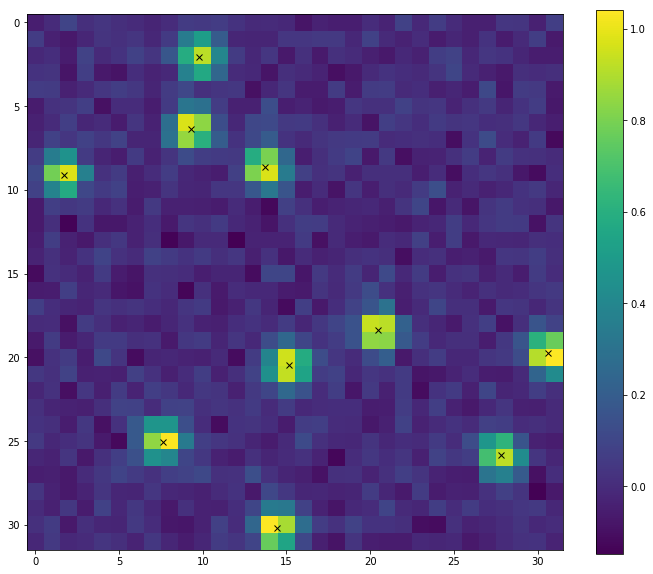

In [15]:
fig = plt.figure()
fig.set_size_inches(12, 10)
plt.imshow(img, extent=((-0.5, nx-0.5, ny-0.5, -0.5)))
plt.colorbar()
for coor in coors:
    plt.plot(coor[0], coor[1], 'kx')

In [160]:
coors

array([[31.76167739, 12.34534011],
       [ 3.42211164, 12.43415555],
       [ 6.72314593, 12.13658909],
       [ 5.75456226, 13.7608974 ],
       [14.18492085,  9.87909859],
       [ 5.6454555 , 30.77331985],
       [25.56803519, 11.44204656],
       [23.47823959, 22.18080279],
       [24.59440055, 29.21823876],
       [28.23495101, 21.08940495]])

## Generate n samples

In [12]:
# n = 10240 # train 
n = 1024 # val/test
m = int(2*nx*ny*k_bar)

imgs = np.zeros( (n, ny, nx) )
labels = np.zeros( (n, m, 2) )
nhits = np.zeros( (n, ), dtype=np.int)

In [13]:
for i in range(n):
    img, coors = sim_detector_image(k_bar, contrast, corr_len, sigma, epsilon_gain, epsilon_ped,
                                nx=nx, ny=ny, return_centers=True)
    imgs[i,:,:] = img
    labels[i,0:coors.shape[0],:] = coors
    nhits[i] = coors.shape[0]

In [14]:
# filename = "train.h5"
# filename = "val.h5"
filename = "test.h5"

with h5py.File(filename, "w") as f:
    ds_imgs = f.create_dataset("imgs", (n, ny, nx), dtype="f")
    ds_imgs[:] = imgs[:]
    ds_labels = f.create_dataset("labels", (n, m, 2), dtype="f")
    ds_labels[:] = labels[:]
    ds_nhits = f.create_dataset("nhits", (n, ), dtype="i8")
    ds_nhits[:] = nhits[:]